In [1]:
!pip install pandas-profiling --quiet

In [2]:
medical_charge_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charge_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x790fa83d86a0>)

In [5]:
!pip install pandas --quiet

In [6]:
import pandas as pd

In [7]:
medical_df = pd.read_csv('medical.csv')

In [8]:
medical_df

#print(medical_df.head())

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [9]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [11]:
#print(medical_df.isnull().sum())
#medical_df = medical_df.dropna()
## Save the cleaned DataFrame to a new CSV file
#medical_df.to_csv('cleaned_medical_data.csv', index=False)

In [12]:
print(medical_df['age'].max())


# Find the index of the row with the maximum age
max_age_index = medical_df['age'].idxmax()

# Get the row with the maximum age
max_age_row = medical_df.loc[max_age_index]
print("The row with the maximum age is:\n", max_age_row)


64
The row with the maximum age is:
 age                  64
sex                male
bmi                24.7
children              1
smoker               no
region        northwest
charges     30166.61817
Name: 62, dtype: object


In [13]:
!pip install plotly matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline 
# show o/p with notebook not as pop up

In [15]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [16]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

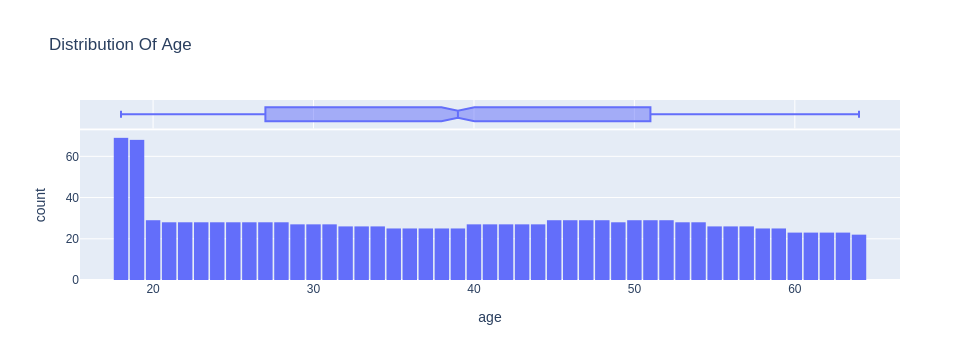

Drawn


In [17]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47, # 64-18   
                   title='Distribution Of Age'
                  )
fig.update_layout(bargap=0.1)
fig.show()
print("Drawn")

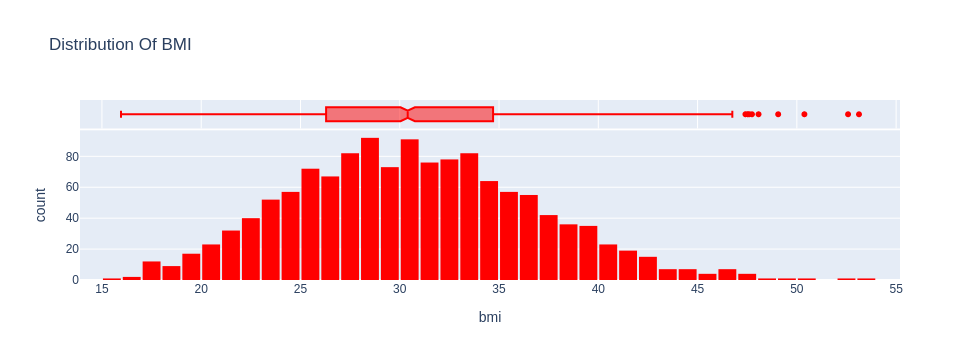

Drawn


In [18]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],  
                   title='Distribution Of BMI'
                  )
fig.update_layout(bargap=0.1)
fig.show()
print("Drawn")

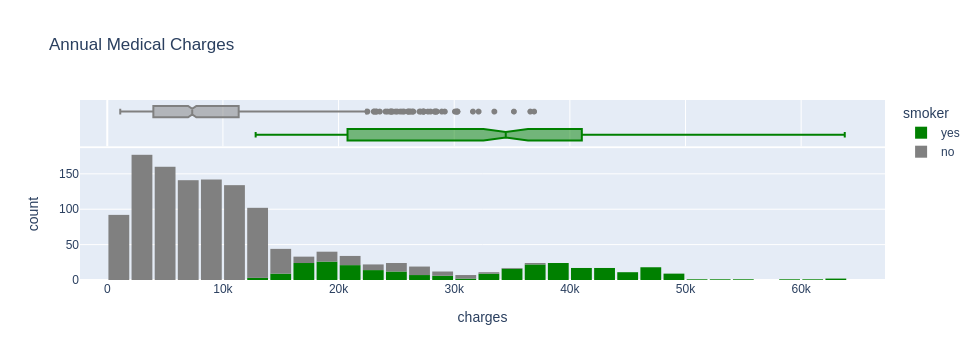

Drawn


In [19]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],  
                   title='Annual Medical Charges'
                  )
fig.update_layout(bargap=0.1)
fig.show()
print("Drawn")

In [20]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

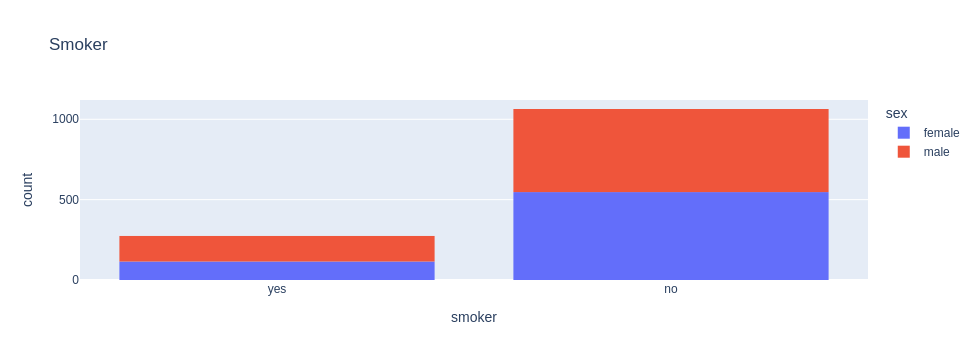

In [21]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

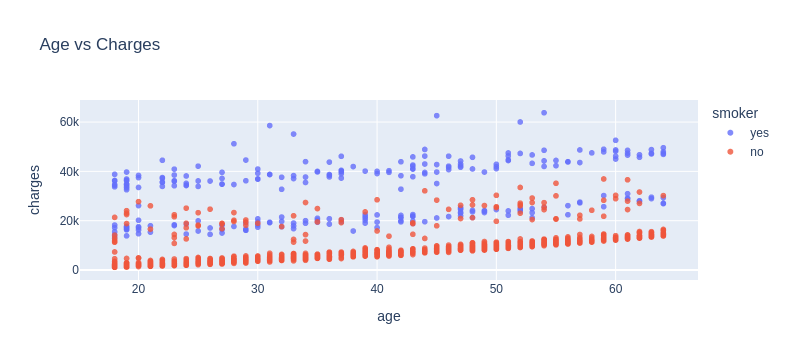

Drawn


In [22]:
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='Age vs Charges'
)
fig.show()

print("Drawn")

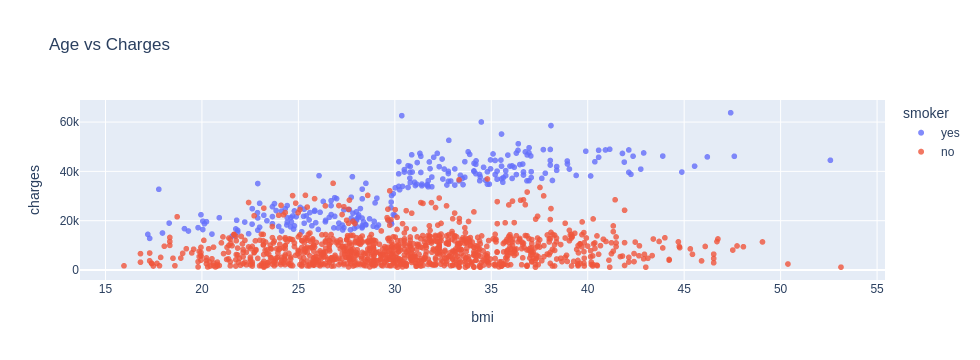

Drawn


In [23]:
fig = px.scatter(
    medical_df,
    x='bmi',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='Age vs Charges'
)
fig.show()

print("Drawn")

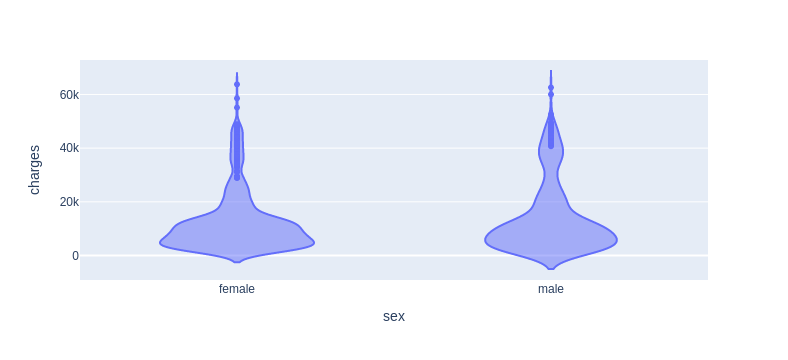

In [24]:
px.violin(medical_df, x='sex', y='charges')

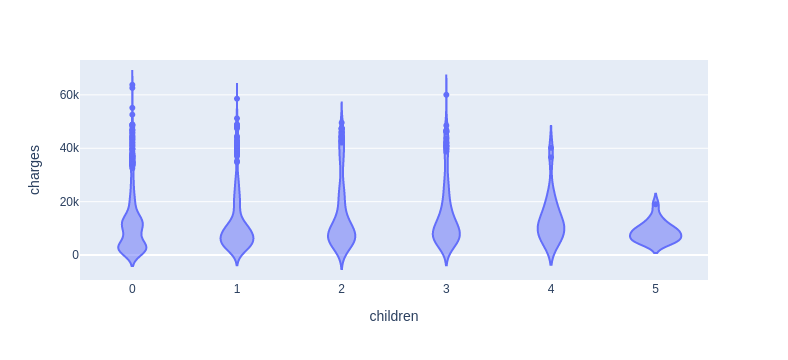

In [25]:
px.violin(medical_df, x='children', y='charges')

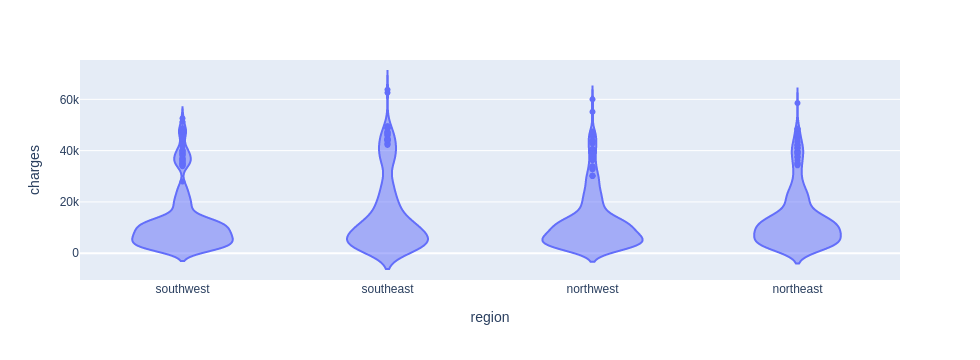

In [26]:
px.violin(medical_df, x='region', y='charges')

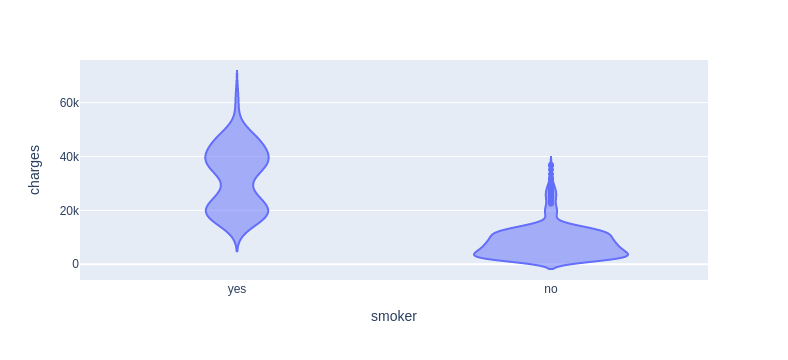

In [27]:
px.violin(medical_df, x='smoker', y='charges')

In [28]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [29]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [30]:
# categorical data
smoker_values = {'no': 0 ,'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [31]:
# categorical data
sex_values = {'male': 0 ,'female': 1}
sex_numeric = medical_df.sex.map(sex_values)
medical_df.charges.corr(sex_numeric)

-0.057292062202025484

-1 and 1 linear relationship: change one follow other
0 no relanship
values b/w 0 and +1/-1 relationship far from line, As approach to +1/-1 strength incr
+ve direction indicates when one incr other value also incr and vice versa for -ve

In [32]:
# Select only numeric columns
numeric_df = medical_df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

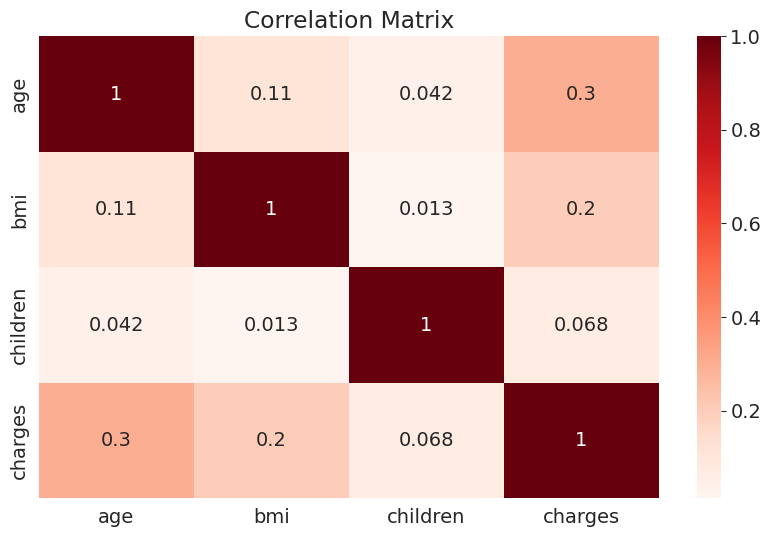

In [33]:
sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [34]:
# Linear Regression using Single Feature

non_smoker_df = medical_df[medical_df.smoker=='no']

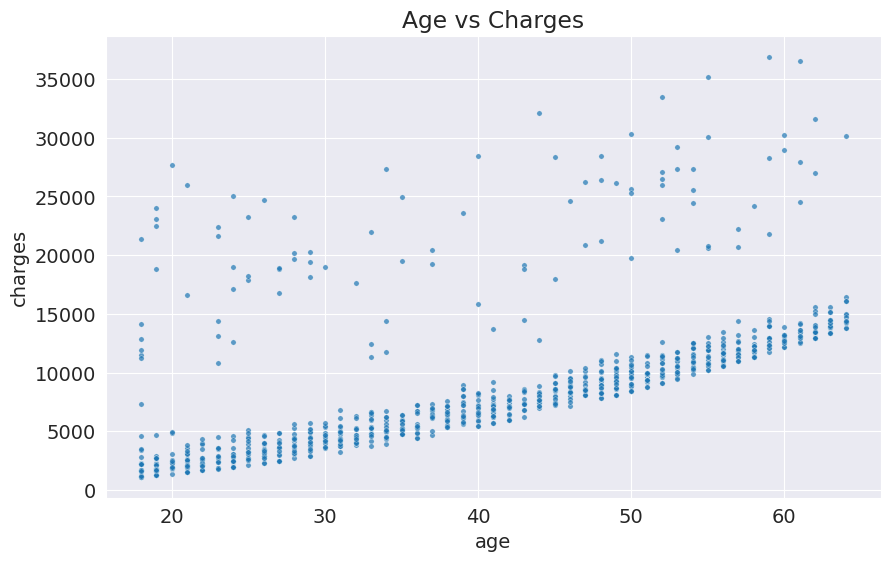

In [35]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges',alpha =0.7,s=15);

In [36]:
def estimate_charges(age, w, b):
    return w*age+b

In [37]:
w=100
b=1


In [38]:
# using model linear
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

1       1801
2       2801
3       3301
4       3201
5       3101
        ... 
1332    5201
1333    5001
1334    1801
1335    1801
1336    2101
Name: age, Length: 1064, dtype: int64

In [39]:
# Actual
non_smoker_df.charges


1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [40]:
#Individual value to simple linear model

estimate_charges(30, w, b)

3001

Text(0, 0.5, 'Estimated Charges')

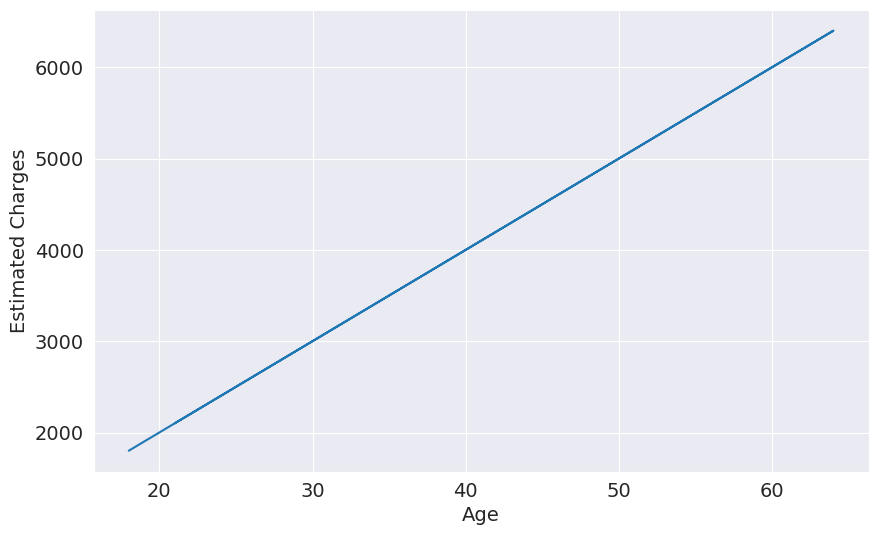

In [41]:
plt.plot(ages, estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

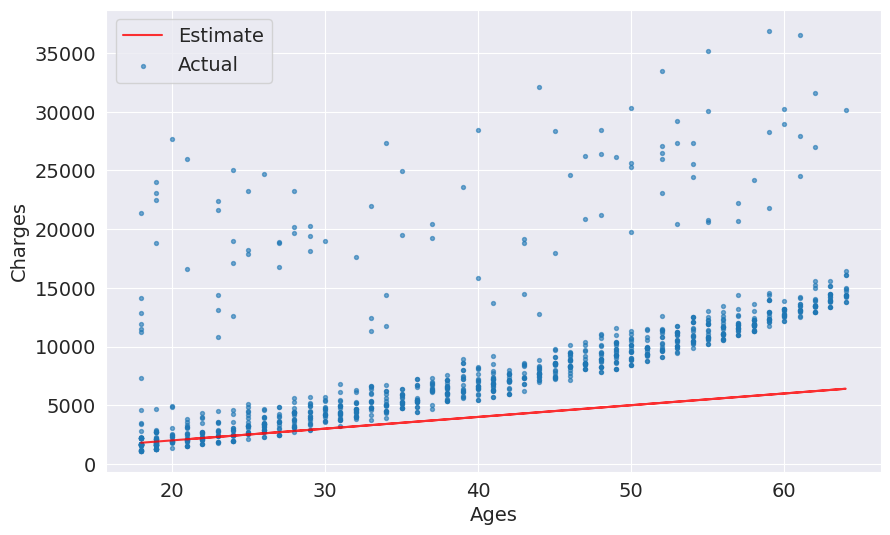

In [42]:
# Plot b/w actual charges and estimated charge

target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.8);

plt.scatter(ages, target, s=8, alpha=0.6)

plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])

In [43]:
non_smoker_df
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges (ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.8);
    
    plt.scatter(ages, target, s=8, alpha=0.6)
    
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])

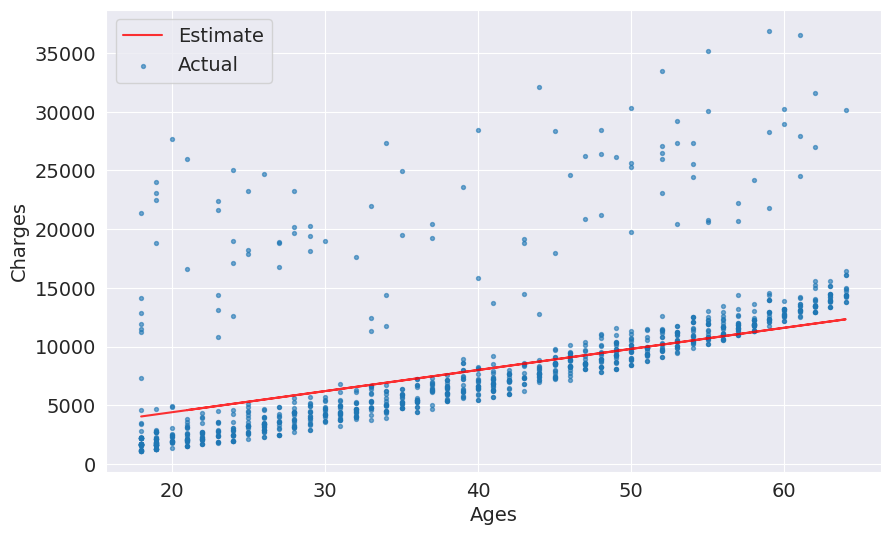

In [44]:
try_parameters(180,800)

In [45]:
estimate_charges(50, 180, 800)

9800

In [46]:
# Calculate loss from actual

predictions = estimated_charges
predictions

1       1801
2       2801
3       3301
4       3201
5       3101
        ... 
1332    5201
1333    5001
1334    1801
1335    1801
1336    2101
Name: age, Length: 1064, dtype: int64

In [47]:
!pip install numpy --quiet

In [48]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [49]:
w=180
b=800

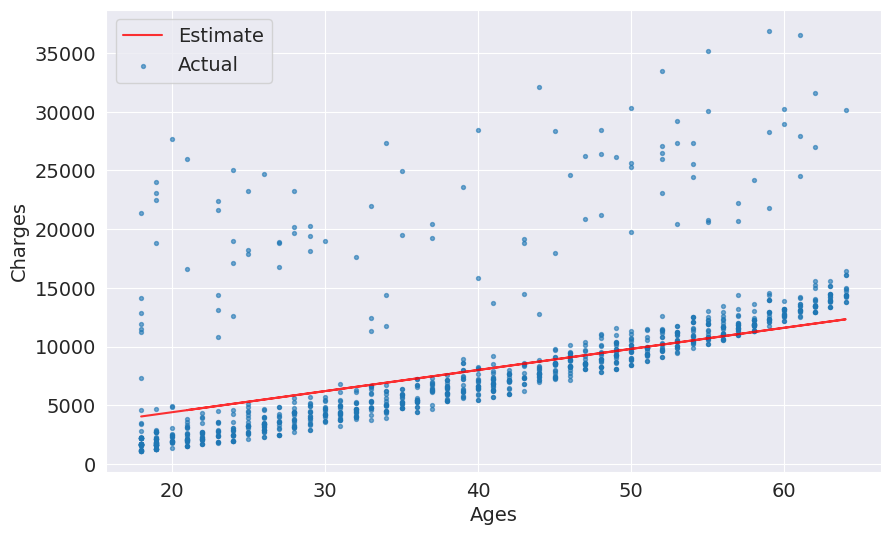

In [50]:
try_parameters(w, b)

In [51]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [52]:
# Result is loss, it represents info loss in model, lower the loss, the better the model

rmse(targets, predicted)

4852.249131225576

In [53]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.8);
    
    plt.scatter(ages, target, s=8, alpha=0.6)
    
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Prediction','Actual'])

    loss=rmse(target, predictions)
    print("RMSE Loss : ", loss)

RMSE Loss :  4715.843358363601


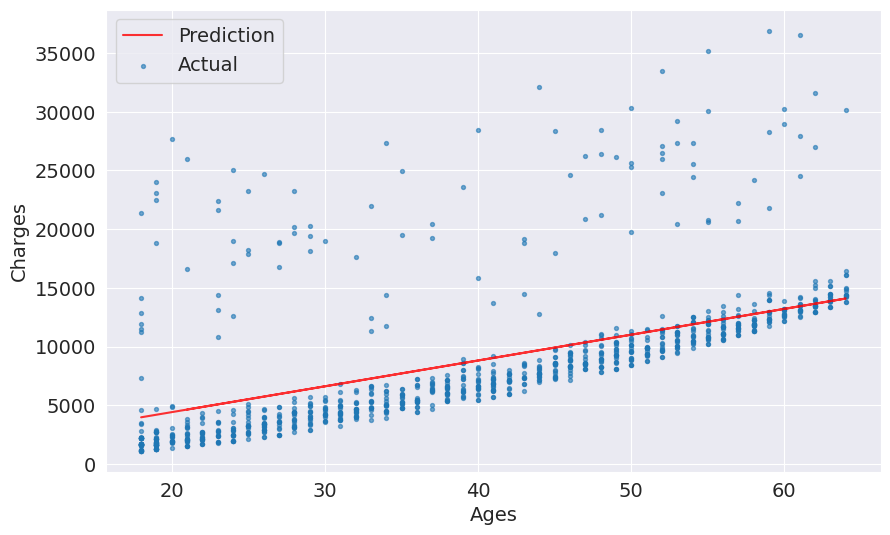

In [54]:
try_parameters(220, 10)

# Instead of putting different values manually we use gradient descent, which is impleneted mathematicalliy using derivatives
# Two methods 
# Ordinary Least Squares : Better for small dataset : use calculas and linear alegbra , mat inv
# Stochastic Gradient Descent : Better for larger dataset : Check all possible directions or values in which directions work

In [55]:
pip install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.4
    Uninstalling matplotlib-3.8.4:
      Successfully uninstalled matplotlib-3.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.8.3 requires matplotlib<3.9,>=3.2, but you have matplotlib 3.9.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [59]:
inputs = non_smoker_df[['age']]  # dataframe (2-D)
targets = non_smoker_df.charges  # series (array)
print('inputs.shape : ', inputs.shape)
print('target.shape : ', targets.shape)

inputs.shape :  (1064, 1)
target.shape :  (1064,)


In [60]:
model.fit(inputs, targets)

LinearRegression()

In [61]:
model.predict(np.array([[23], [37], [61]])) # test input ages

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [62]:
predictions = model.predict(inputs)
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

cdf = pd.concat([inputs.reset_index(drop=True), predictions_df], axis=1)
cdf

age    Prediction
0      18   2719.059874
1      28   5391.549003
2      33   6727.793567
3      32   6460.544654
4      31   6193.295741
...   ...           ...
1059   52  11805.522911
1060   50  11271.025085
1061   18   2719.059874
1062   18   2719.059874
1063   21   3520.806613

[1064 rows x 2 columns]

In [63]:
rmse(targets, predictions)

4662.505766636395

In [64]:
# weight is stored in model.coef_ for age
model.coef_

array([267.24891283])

In [65]:
# bias is stored in model.intercept_
model.intercept_

-2091.4205565650864

In [66]:
from sklearn.linear_model import SGDRegressor


In [67]:
grad_d_model = SGDRegressor()

In [68]:
help(grad_d_model.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.
    
    y : ndarray of shape (n_samples,)
        Target values.
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [69]:
grad_d_model.fit(inputs, targets)

SGDRegressor()

In [70]:
grad_d_model.predict(np.array([[23], [37], [61]])) # test input ages

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([13041.24065259, 20608.12863334, 33579.93660034])

In [71]:
predictions2 = grad_d_model.predict(inputs)
predictions_df_2 = pd.DataFrame(predictions2, columns=['Prediction'])

cdf_2 = pd.concat([inputs.reset_index(drop=True), predictions_df_2], axis=1)
cdf_2

age    Prediction
0      18  10338.780659
1      28  15743.700646
2      33  18446.160639
3      32  17905.668640
4      31  17365.176642
...   ...           ...
1059   52  28715.508613
1060   50  27634.524615
1061   18  10338.780659
1062   18  10338.780659
1063   21  11960.256655

[1064 rows x 2 columns]

In [72]:
rmse(targets, predictions)

4662.505766636395

In [73]:
# weight is stored in model.coef_ for age
model.coef_

array([267.24891283])

In [74]:
# bias is stored in model.intercept_
model.intercept_

-2091.4205565650864

END

In [75]:
# Now for smokers

smoker_df = medical_df[medical_df.smoker=='yes']
smoker_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]

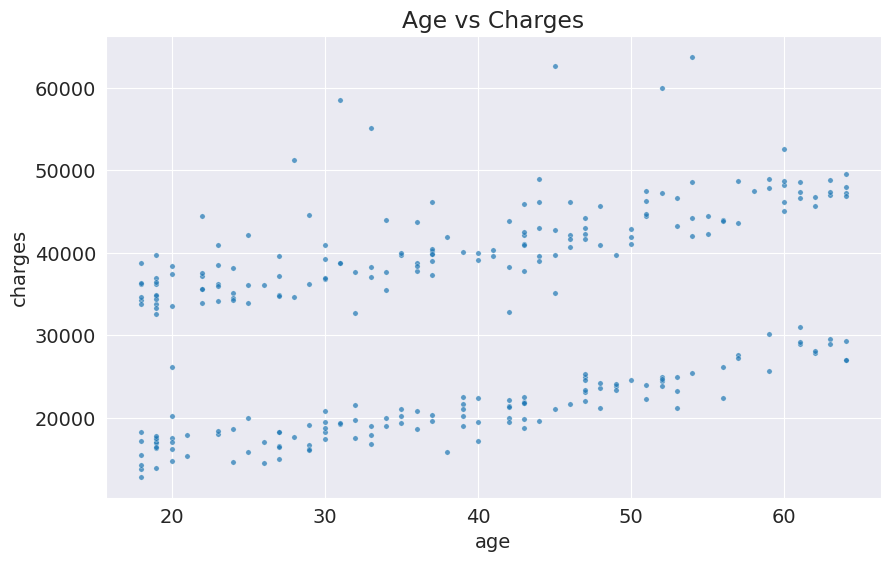

In [76]:
plt.title('Age vs Charges')
sns.scatterplot(data=smoker_df, x='age', y='charges',alpha =0.7,s=15);

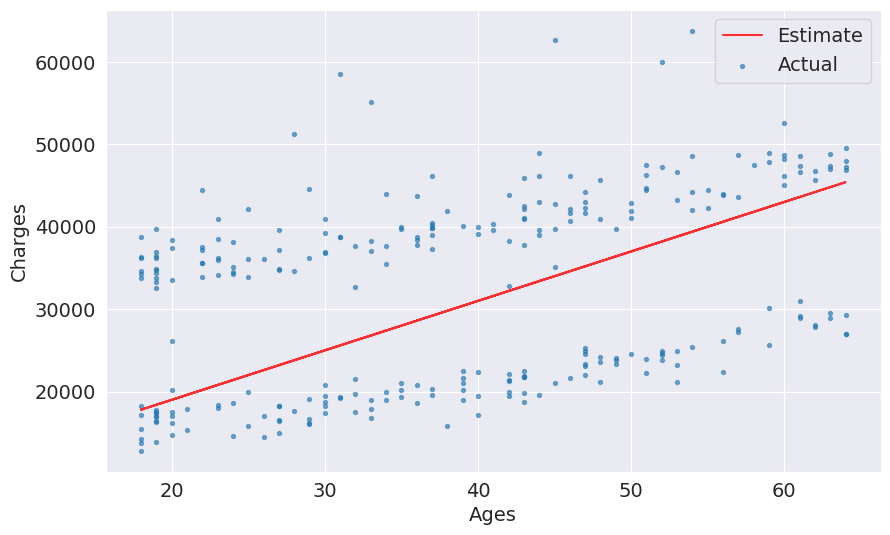

In [77]:
target2 = smoker_df.charges
ages2 = smoker_df.age
w=600
b=7000
estimated_charges = estimate_charges(ages2,w,b)


plt.plot(ages2, estimated_charges, 'r', alpha=0.8);

plt.scatter(ages2, target2, s=8, alpha=0.6)

plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])

In [78]:
model_3 = LinearRegression()

In [79]:
inputs2 = smoker_df[['age']]  # dataframe (2-D)
targets2 = smoker_df.charges  # series (array)
print('inputs.shape : ', inputs2.shape)
print('target.shape : ', targets2.shape)

inputs.shape :  (274, 1)
target.shape :  (274,)


In [80]:
model_3.fit(inputs2, targets2)

LinearRegression()

In [81]:
# Assuming `smoker_df` is your DataFrame and `charges` is a column in it
charges_df = smoker_df[['charges']].reset_index(drop=True)

# Predict on the inputs2
predictions3 = model.predict(inputs2)

# Create a DataFrame for predictions
predictions_df3 = pd.DataFrame(predictions3, columns=['Prediction'])

# Concatenate inputs2, predictions, and charges
cdf3 = pd.concat([inputs2.reset_index(drop=True), predictions_df3, charges_df], axis=1)

# Print the combined DataFrame
print(cdf3)


     age    Prediction      charges
0     19   2986.308787  16884.92400
1     62  14478.012039  27808.72510
2     27   5124.300090  39611.75770
3     30   5926.046828  36837.46700
4     34   6995.042480  37701.87680
..   ...           ...          ...
269   19   2986.308787  36397.57600
270   30   5926.046828  18765.87545
271   62  14478.012039  28101.33305
272   42   9133.033782  43896.37630
273   61  14210.763126  29141.36030

[274 rows x 3 columns]


In [82]:
rmse(targets2, predictions3)

26148.867808867617

In [83]:
# weight is stored in model.coef_ for age
model_3.coef_

array([305.23760211])

In [84]:
model_3.intercept_

20294.128126915966

END

ML is the process of computing best parameters to model the relnship b/w some feature and targets
Every ML model has 3 components : 
    1. Model
    2. Cost Function
    3. Optimizer

In [85]:
inputs, targets = non_smoker_df[['age']], non_smoker_df[['charges']]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

loss=rmse(targets, predictions)
print('Loss : ', loss)

                         

Loss :  4662.505766636395


In [86]:
inputs1, targets1 = smoker_df[['age']], smoker_df[['charges']]
model1 = LinearRegression().fit(inputs1, targets1)
predictions1 = model1.predict(inputs1)

loss=rmse(targets1, predictions1)
print('Loss : ', loss)

                         

Loss :  10711.00334810241


# Linear Regression using multiple charges
## charges = w1 x age + w2 x bmi + b

In [87]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df[['charges']]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

loss=rmse(targets, predictions)
print('Loss : ', loss)

                         

Loss :  4662.3128354612945


In [88]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

Text(0.5, 1.0, 'Correlation Matrix')

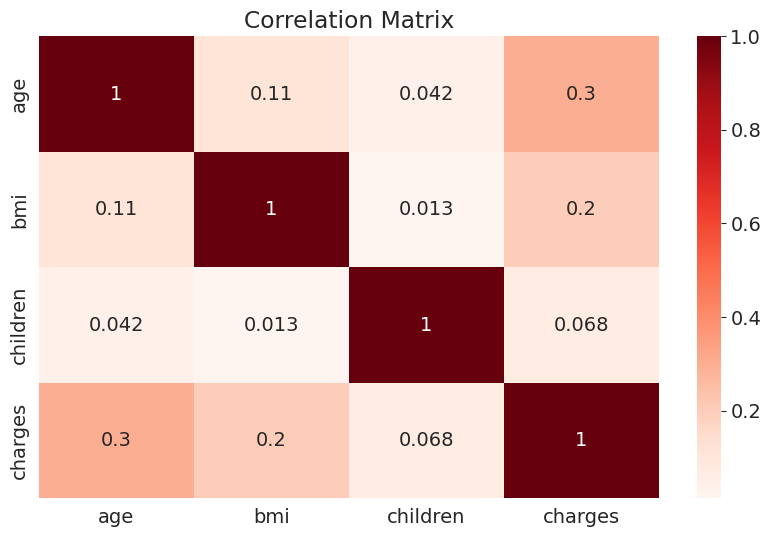

In [89]:
# Check for imporvement of Loss bmi hav less relation so less changes in loss

sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

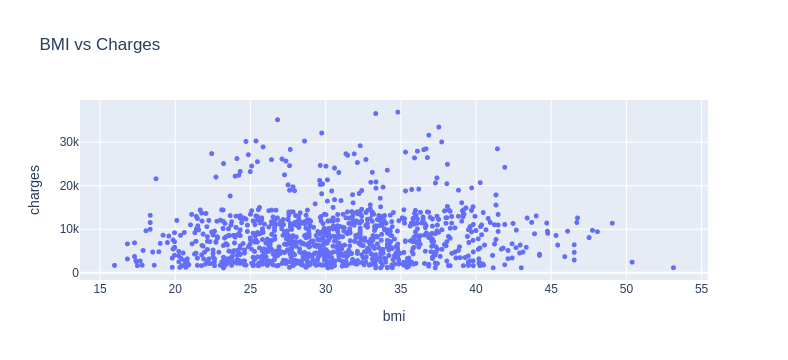

In [90]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

# Can fit a line to below line. BMI has no incluence on data so we can't make model relay on it.

In [91]:
model.coef_, model.intercept_

(array([[266.87657817,   7.07547666]]), array([-2293.63209065]))

charges = w1 x age + w2 x bmi + w3 x charges + b

In [92]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

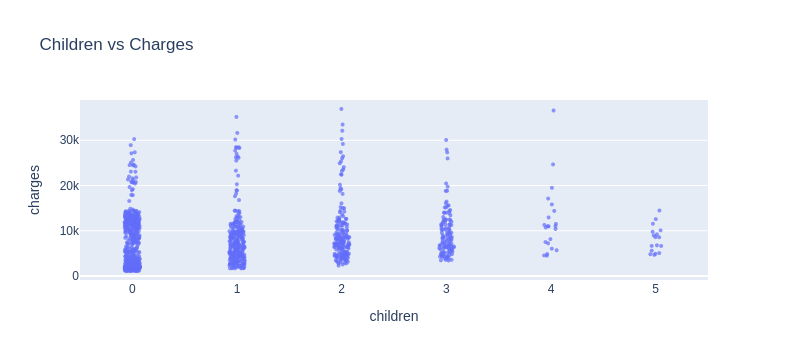

In [93]:
# strip plot is similiar to violin plot

fig = px.strip(non_smoker_df, x='children', y='charges', title="Children vs Charges", height=700)
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [94]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df[['charges']]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

loss=rmse(targets, predictions)
print('Loss : ', loss)

                         

Loss :  4608.470405038247


In [95]:
non_smoker_df = medical_df[medical_df.smoker=='no']
non_smoker_df

age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]

In [96]:
non_smoker_df['region'].unique()

array(['southeast', 'northwest', 'northeast', 'southwest'], dtype=object)

In [97]:
from sklearn.preprocessing import LabelEncoder


# Filter out non-smokers
non_smoker_df = medical_df[medical_df['smoker'] == 'no']

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'sex' column using LabelEncoder and avoid SettingWithCopyWarning
non_smoker_df.loc[:, 'sex'] = label_encoder.fit_transform(non_smoker_df['sex'])

# One-hot encode the 'region' column
non_smoker_df = pd.get_dummies(non_smoker_df, columns=['region'], drop_first=True)

# Define inputs and targets dynamically
input_columns = ['age', 'bmi', 'children', 'sex'] + [col for col in non_smoker_df.columns if col.startswith('region_')]
inputs = non_smoker_df[input_columns]
targets = non_smoker_df[['charges']]

# Fit the linear regression model
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

# Calculate RMSE and optional R-squared
rmse = rmse(targets, predictions) 
print('Loss (RMSE):', rmse)


Loss (RMSE): 4573.074988795492


In [98]:
smoker_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]

In [101]:
from sklearn.preprocessing import LabelEncoder


# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'sex' and 'region' columns using LabelEncoder and avoid SettingWithCopyWarning
smoker_df.loc[:, 'sex'] = label_encoder.fit_transform(smoker_df['sex'])
smoker_df.loc[:, 'region'] = label_encoder.fit_transform(smoker_df['region'])

# Define inputs and targets
inputs = smoker_df[['age', 'bmi', 'children', 'sex', 'region']]
targets = smoker_df[['charges']]

# Fit the linear regression model
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

# Calculate RMSE using mean_squared_error (without squared=False argument)
rmse = rmse(targets, predictions) ** 0.5  # Calculate RMSE from squared error
print('Loss (RMSE):', rmse)


TypeError: 'numpy.float64' object is not callable

In [102]:
medical_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [103]:
# Define inputs and targets
inputs = medical_df[['age', 'bmi', 'children']]
targets = medical_df[['charges']]

# Fit the linear regression model
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

# Calculate RMSE using mean_squared_error with squared=False
rmse = rmse(targets, predictions) 
print('Loss (RMSE):', rmse)

TypeError: 'numpy.float64' object is not callable

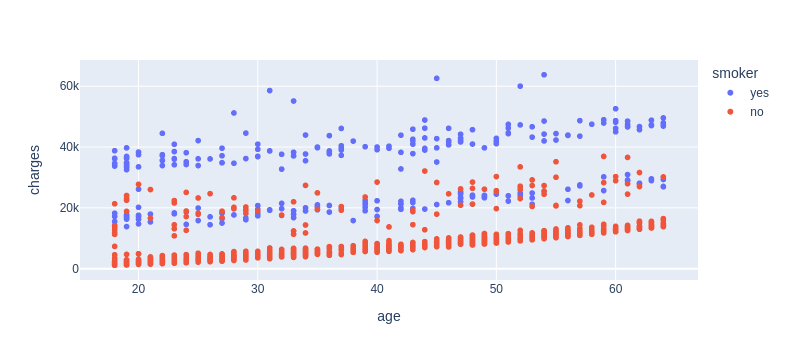

In [104]:
px.scatter(medical_df, x='age', y='charges', color='smoker', height=600)

# Loss :  11355.317901125973 Here our predications is of by 10k. So we use categorical features for ML. If two category we use 0 and 1. If more than 2 categories we perform one-hot encoding(single col is true), i.e create a new column for each category with 1's and 0's. If values have some natural order like cold, neutral, warm, hot they can be numbered as 1,2,3,4 with order. These are called ordinals

# Binary Categories

<Axes: xlabel='smoker', ylabel='charges'>

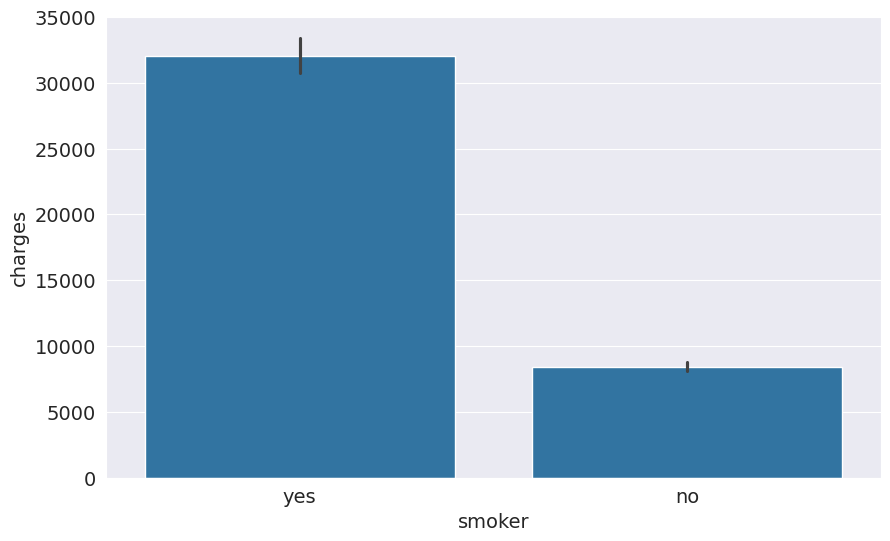

In [105]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [106]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_codes'] = medical_df.smoker.map(smoker_codes)
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_codes  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
1333             0  
1334             0  
1335             0  
1336             0  
1337             1  

[1338 rows x 8 columns]

In [107]:
medical_df.charges.corr(medical_df.smoker_codes)

0.787251430498478

# Use smoker code for linear regression with age, bmi

## charges = w1 x age + w2 x bmi + w3 x charges + w4 x smoker + w5 x sex + b

Reduction of loss from "Loss (RMSE): 11355.317901125973" to Loss (RMSE): 6056.439217188081 arnd 50%

In [108]:
# Define inputs and targets
inputs = medical_df[['age', 'bmi', 'children', 'smoker_codes']]
targets = medical_df[['charges']]

# Fit the linear regression model
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

def calculate_rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

rmse_value = calculate_rmse(targets, predictions)
print('Loss (RMSE):', rmse_value)

Loss (RMSE): 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

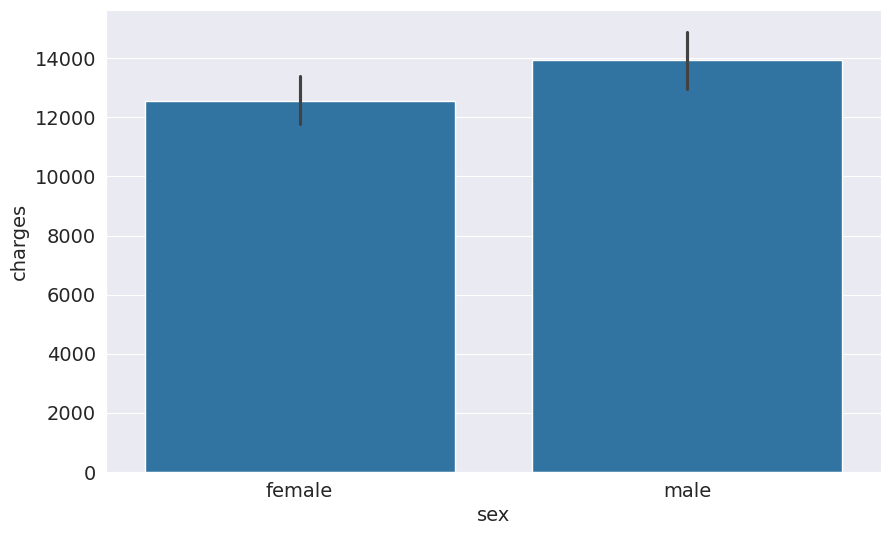

In [109]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [110]:
sex_code = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_code)
medical_df

print("Corr b/w charges and sex_code", medical_df.charges.corr(medical_df.sex_code))

Corr b/w charges and sex_code 0.057292062202025484


In [111]:
# Define inputs and targets
inputs = medical_df[['age', 'bmi', 'children', 'smoker_codes', 'sex_code']]
targets = medical_df[['charges']]

# Fit the linear regression model
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

def calculate_rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

rmse_value = calculate_rmse(targets, predictions)
print('Loss (RMSE):', rmse_value)

Loss (RMSE): 6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

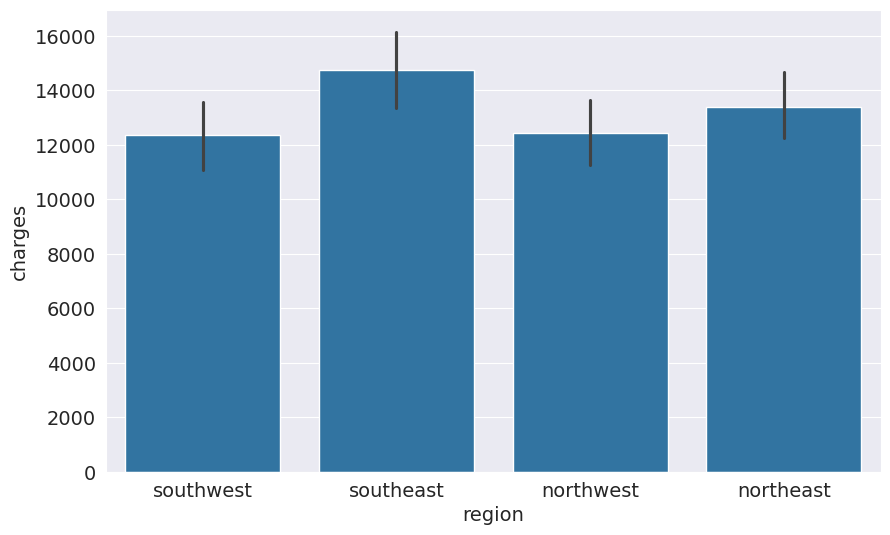

In [112]:
sns.barplot(data=medical_df, x='region', y='charges')

In [113]:
from sklearn import preprocessing as preproc
enc = preproc.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [114]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [115]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_codes  sex_code  northeast  northwest  southeast  southwest  
0                1         0        0.0        0.0        0.0        1.0  
1                0         1        0.0        0.0        1.0        0.0  
2                0         1        0.0        0.0        1.0        0.0  
3                0         1        0.0        1.0        0.0        0.0  
4                0         1        0.0        1.0        0.0        0.0  
...            ...       ...        ...        ...        ...        ...  
1333             0         1        0.0        1.0        0.0        0.0  
1334             0         0        1.0        0.0        0.0        0.0  
1335             0         0        0.0        0.0        1.0        0.0  
1336             0         0        0.0        0.0        0.0        1.0  
1337             1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [116]:
# Define inputs and targets
inputs = medical_df[['age', 'bmi', 'children', 'smoker_codes', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']]
targets = medical_df[['charges']]

# Fit the linear regression model
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

def calculate_rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

rmse_value = calculate_rmse(targets, predictions)
print('Loss (RMSE):', rmse_value)

Loss (RMSE): 6041.6796511744515


# Model Improvements
### Sepertate linear reg model one for smoker and other for non smoker. Is better ? 

In [117]:
print(medical_df.columns)
model.coef_

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_codes', 'sex_code', 'northeast', 'northwest', 'southeast',
       'southwest'],
      dtype='object')


array([[  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]])

In [118]:
model.intercept_

array([-12525.5478112])

In [119]:
input_cols = ['age', 'bmi', 'children', 'smoker_codes', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

feature        weight
0           age    256.856353
1           bmi    339.193454
2      children    475.500545
3  smoker_codes  23848.534542
4      sex_code   -131.314359
5     northeast    587.009235
6     northwest    234.045336
7     southeast   -448.012814
8     southwest   -373.041756
9             1 -12525.547811

Here BMI now have higher influence than age which doesn't make sense when we compare our model with data. This is bcz of range of values so perform standardization

In [120]:
print("Parameters :\n", medical_df[input_cols].loc[10])
print("Actual Charge : ", medical_df['charges'].loc[10])

Parameters :
 age             25.00
bmi             26.22
children         0.00
smoker_codes     0.00
sex_code         1.00
northeast        1.00
northwest        0.00
southeast        0.00
southwest        0.00
Name: 10, dtype: float64
Actual Charge :  2721.3208


In [121]:
print("Predicted Cost For Above Person Using Model" ,model.predict([[25,26.22,0,0,1,1,0,0,0]]))

Predicted Cost For Above Person Using Model [[3245.20823155]]


/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



# Normalisation

In [122]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_codes  sex_code  northeast  northwest  southeast  southwest  
0                1         0        0.0        0.0        0.0        1.0  
1                0         1        0.0        0.0        1.0        0.0  
2                0         1        0.0        0.0        1.0        0.0  
3                0         1        0.0        1.0        0.0        0.0  
4                0         1        0.0        1.0        0.0        0.0  
...            ...       ...        ...        ...        ...        ...  
1333             0         1        0.0        1.0        0.0        0.0  
1334             0         0        1.0        0.0        0.0        0.0  
1335             0         0        0.0        0.0        1.0        0.0  
1336             0         0        0.0        0.0        0.0        1.0  
1337             1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [125]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [126]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [127]:
scaler

StandardScaler()

In [128]:
medical_df[numeric_cols]

age     bmi  children
0      19  27.900         0
1      18  33.770         1
2      28  33.000         3
3      33  22.705         0
4      32  28.880         0
...   ...     ...       ...
1333   50  30.970         3
1334   18  31.920         0
1335   18  36.850         0
1336   21  25.800         0
1337   61  29.070         0

[1338 rows x 3 columns]

In [129]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [130]:
cat_cols = ['smoker_codes', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [131]:
inputs8 = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets8 = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs8, targets8)

# Generate predictions
predictions8 = model.predict(inputs8)

# Compute loss to evalute the model
loss8 = calculate_rmse(targets8, predictions8)
print('Loss:', loss8)

Loss: 6041.6796511744515


In [132]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

# Not working properly

feature        weight
3  smoker_codes  23848.534542
9             1   8466.483215
0           age   3607.472736
1           bmi   2067.691966
5     northeast    587.009235
2      children    572.998210
6     northwest    234.045336
4      sex_code   -131.314359
8     southwest   -373.041756
7     southeast   -448.012814

In [133]:
new_customers = [[28, 30, 2, 1, 0, 0, 1, 0, 0.]]

In [134]:
scaler.transform([[28, 30, 2]])

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [135]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0.]])

# Order of factors effecting charges smoke , age, bmi

array([29875.81463371])

In [ ]:
# How to approach a ML Problem : 02:17:31 IMP https://youtu.be/hDKCxebp88A?si=-Sj4kkGUfL7G0S-Z

## 1. Explore data and find correlations b/w inputs and targets
## 2. Pick the right model (linear regre), loss functions (rmse) and optimizer (least sqaure) for problem at hand
## 3. Scale numeric variables (mean of 0 and std as 1) and one-hot encode categorical data
## 4. Set aside a test set (using a portion of training set)
## 5. Train the model
## 6. Make predictions on the test set and compute loss
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++













In [170]:
import joblib

# Assuming 'model' is your trained LinearRegression model
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [ ]:
joblib.dump(scaler, 'scaler.pkl')


In [145]:
smoker_df = medical_df[medical_df.smoker=='yes']
non_smoker_df = medical_df[medical_df.smoker=='no']

numeric_cols = ['age', 'bmi', 'children'] 
scaler1 = StandardScaler()
scaler1.fit(smoker_df[numeric_cols])
scaler2 = StandardScaler()
scaler2.fit(non_smoker_df[numeric_cols])

scaled_inputs1 = scaler.transform(smoker_df[numeric_cols])
scaled_inputs1
scaled_inputs2 = scaler.transform(non_smoker_df[numeric_cols])
scaled_inputs2

cat_cols = ['sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data1 = smoker_df[cat_cols].values
categorical_data2 = non_smoker_df[cat_cols].values

In [146]:
inputs = np.concatenate((scaled_inputs1, categorical_data1), axis=1)
targets = smoker_df.charges

# Create and train the model
smoker_model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = smoker_model.predict(inputs)

# Compute loss to evalute the model
loss = calculate_rmse(targets, predictions)
print('Loss:', loss)

Loss: 5668.4678821121515


In [148]:
inputs = np.concatenate((scaled_inputs2, categorical_data2), axis=1)
targets = non_smoker_df.charges

# Create and train the model
non_smoker_model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = non_smoker_model.predict(inputs)

# Compute loss to evalute the model
loss = calculate_rmse(targets, predictions)
print('Loss:', loss)

Loss: 4573.074988795492


In [149]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(smoker_model.coef_, smoker_model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

# Not working properly

feature        weight
8          1  32503.098961
1        bmi   8994.789880
0        age   3755.616801
4  northeast    754.585021
7  southwest    318.701480
2   children    220.205250
5  northwest     64.866996
3   sex_code   -388.121649
6  southeast  -1138.153497

In [160]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split data into smoker and non-smoker dataframes
smoker_df = medical_df[medical_df.smoker == 'yes']
non_smoker_df = medical_df[medical_df.smoker == 'no']

# Define numeric columns
numeric_cols = ['age', 'bmi', 'children']

# Initialize and fit scalers
scaler1 = StandardScaler()
scaler2 = StandardScaler()

# Fit the scalers on smoker and non-smoker data
scaler1.fit(smoker_df[numeric_cols])
scaler2.fit(non_smoker_df[numeric_cols])

# Transform the data using the respective scalers
scaled_inputs1 = scaler1.transform(smoker_df[numeric_cols])
scaled_inputs2 = scaler2.transform(non_smoker_df[numeric_cols])

# Define categorical columns
cat_cols = ['sex_code', 'northeast', 'northwest', 'southeast', 'southwest']

# Extract categorical data
categorical_data1 = smoker_df[cat_cols].values
categorical_data2 = non_smoker_df[cat_cols].values


In [161]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Combine scaled numeric and categorical data
inputs1 = np.concatenate((scaled_inputs1, categorical_data1), axis=1)
targets1 = smoker_df.charges

# Create and train the model
smoker_model = LinearRegression().fit(inputs1, targets1)

# Generate predictions
predictions1 = smoker_model.predict(inputs1)

# Compute loss to evaluate the model
def calculate_rmse(targets, predictions):
    return np.sqrt(np.mean((targets - predictions) ** 2))

loss1 = calculate_rmse(targets1, predictions1)
print('Loss for smokers:', loss1)


Loss for smokers: 5668.4678821121515


In [162]:
# Combine scaled numeric and categorical data
inputs2 = np.concatenate((scaled_inputs2, categorical_data2), axis=1)
targets2 = non_smoker_df.charges

# Create and train the model
non_smoker_model = LinearRegression().fit(inputs2, targets2)

# Generate predictions
predictions2 = non_smoker_model.predict(inputs2)

# Compute loss to evaluate the model
loss2 = calculate_rmse(targets2, predictions2)
print('Loss for non-smokers:', loss2)


Loss for non-smokers: 4573.074988795492


In [168]:
# Combine numeric and categorical columns
all_features = numeric_cols + cat_cols

# Append intercept to coefficients for smokers model
smoker_weights = np.append(smoker_model.coef_, smoker_model.intercept_)
smoker_weights_df = pd.DataFrame({
    'feature': all_features + ['intercept'],
    'weight': smoker_weights
})
smoker_weights_df = smoker_weights_df.sort_values('weight', ascending=False)

print(smoker_weights_df)

# Append intercept to coefficients for non-smokers model
non_smoker_weights = np.append(non_smoker_model.coef_, non_smoker_model.intercept_)
non_smoker_weights_df = pd.DataFrame({
    'feature': all_features + ['intercept'],
    'weight': non_smoker_weights
})
non_smoker_weights_df = non_smoker_weights_df.sort_values('weight', ascending=False)

print("\n",non_smoker_weights_df)


     feature        weight
8  intercept  32387.746950
1        bmi   9306.418373
0        age   3716.320675
4  northeast    754.585021
7  southwest    318.701480
2   children    211.052011
5  northwest     64.866996
3   sex_code   -388.121649
6  southeast  -1138.153497

      feature       weight
8  intercept  8698.191008
0        age  3723.049747
4  northeast   733.683019
2   children   715.267726
5  northwest   185.554256
1        bmi   114.647131
6  southeast  -258.365372
3   sex_code  -525.970487
7  southwest  -660.871903


In [173]:
joblib.dump(smoker_model, 'linear_regression_smoker_model.pkl')
joblib.dump(non_smoker_model, 'linear_regression_non_smoker_model.pkl')
joblib.dump(scaler1, 'scaler_smoker.pkl')
joblib.dump(scaler2, 'scaler_non_smoker.pkl')


['scaler_non_smoker.pkl']

In [174]:
scaler1.transform([[20, 22, 0]])


/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-1.33220066, -1.38073674, -0.96379619]])

In [176]:
smoker_model.predict([[-1.33220066, -1.38073674, -0.96379619, 1, 1, 0, 0, 0,]])


array([14750.20057537])

In [177]:
scaler2.transform([[20, 22, 0]])


/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-1.37711353, -1.43235216, -0.89541578]])

In [179]:
non_smoker_model.predict([[-1.37711353, -1.43235216, -0.89541578, 1, 1, 0, 0, 0,]])


array([2974.16428576])